In [3]:

import pandas as pd

import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB

import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import re
import string
import pickle

In [2]:
data = pd.read_csv('/content/product review.csv',
                   encoding='latin',
                   names=['polarity','id','date','query','user','text'],
                   engine='python',
                   on_bad_lines='skip')
data = data.sample(frac=1)
data = data[:200000]
with open('/content/product review.csv', encoding='latin') as f:
    for i, line in enumerate(f):
        cols = line.strip().split(',')
        if len(cols) != 6:
            print(f"Row {i} has {len(cols)} columns: {cols[:3]}...")


FileNotFoundError: [Errno 2] No such file or directory: '/content/product review.csv'

In [ ]:
data = data.sample(frac=1)
data = data[:200000]

In [ ]:
print("Dataset shape:", data.shape)

Dataset shape: (200000, 6)


In [ ]:
data.head(10)

,polarity,id,date,query,user,text
353705,0,2032932707,Thu Jun 04 11:58:50 PDT 2009,NO_QUERY,tractorqueen,@TinchenFFM what sort of news? I guess u've he...
835810,4,1558291733,Sun Apr 19 07:55:02 PDT 2009,NO_QUERY,Ellsbeth,@paulawhite Started reading Sci-Fi in 8th gr. ...
1235288,4,1992560890,Mon Jun 01 08:57:17 PDT 2009,NO_QUERY,elliethompsett,"@MadJackie im sure your baskets will b great, ..."
563967,0,2206073518,Wed Jun 17 05:57:36 PDT 2009,NO_QUERY,Ellen_Stafford,Depression is so horrible. I just want my litt...
1257110,4,1997618682,Mon Jun 01 17:09:52 PDT 2009,NO_QUERY,iSHiNE11,July 6th...Blackberry Storm
408383,0,2059393159,Sat Jun 06 16:50:36 PDT 2009,NO_QUERY,lilgnome3,quite tired! been getting up early! like at 9 ...
1323587,4,2014918444,Wed Jun 03 03:06:56 PDT 2009,NO_QUERY,Stefanvds,@dokus fav: http://bit.ly/167PK7 love is ever...
1129722,4,1975581537,Sat May 30 15:27:44 PDT 2009,NO_QUERY,Jessbrown123,loverd her day in the sea with Jay
666737,0,2245386773,Fri Jun 19 16:03:36 PDT 2009,NO_QUERY,autumnbledsoe,All but one of my lizard babies grew up and le...
767525,0,2300499689,Tue Jun 23 14:13:31 PDT 2009,NO_QUERY,bbluvbug,ugh bbl... i dont kno why this charger isnt wo...


In [ ]:
data['polarity'].unique()

array([0, 4])

In [ ]:
data['polarity'] = data['polarity'].replace(4,1)
data.head()

,polarity,id,date,query,user,text
353705,0,2032932707,Thu Jun 04 11:58:50 PDT 2009,NO_QUERY,tractorqueen,@TinchenFFM what sort of news? I guess u've he...
835810,1,1558291733,Sun Apr 19 07:55:02 PDT 2009,NO_QUERY,Ellsbeth,@paulawhite Started reading Sci-Fi in 8th gr. ...
1235288,1,1992560890,Mon Jun 01 08:57:17 PDT 2009,NO_QUERY,elliethompsett,"@MadJackie im sure your baskets will b great, ..."
563967,0,2206073518,Wed Jun 17 05:57:36 PDT 2009,NO_QUERY,Ellen_Stafford,Depression is so horrible. I just want my litt...
1257110,1,1997618682,Mon Jun 01 17:09:52 PDT 2009,NO_QUERY,iSHiNE11,July 6th...Blackberry Storm


In [ ]:
data.describe()

,polarity,id
count,200000.000000,2.000000e+05
mean,0.500405,1.998516e+09
std,0.500001,1.939368e+08
min,0.000000,1.467810e+09
25%,0.000000,1.956694e+09
50%,1.000000,2.001995e+09
75%,1.000000,2.177051e+09
max,1.000000,2.329205e+09


In [ ]:
positives = data['polarity'][data.polarity == 1 ]
negatives = data['polarity'][data.polarity == 0 ]

print('Total length of the data is:         {}'.format(data.shape[0]))
print('No. of positve tagged sentences is:  {}'.format(len(positives)))
print('No. of negative tagged sentences is: {}'.format(len(negatives)))

Total length of the data is:         200000
No. of positve tagged sentences is:  100081
No. of negative tagged sentences is: 99919


In [ ]:
def word_count(words):
    return len(words.split())

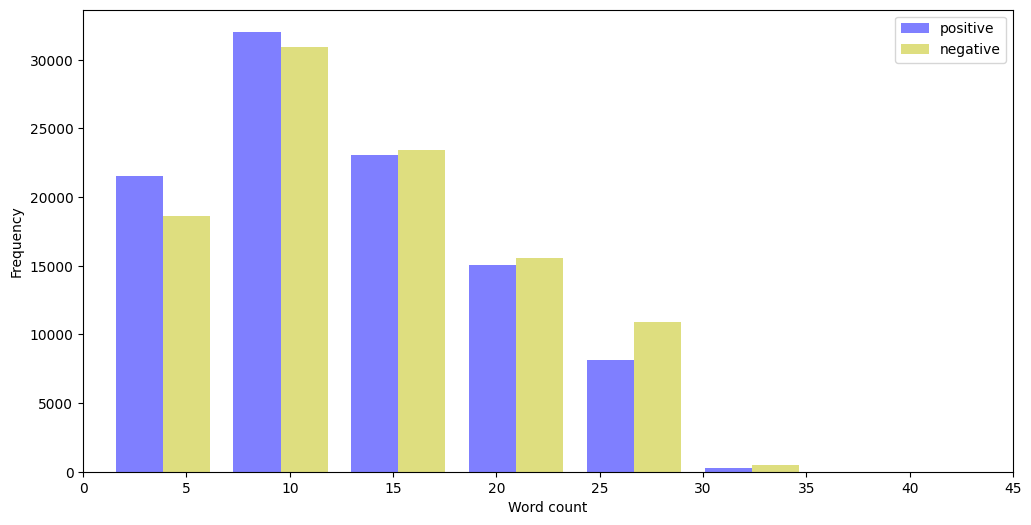

In [ ]:
data['word count'] = data['text'].apply(word_count)
p = data['word count'][data.polarity == 1]
n = data['word count'][data.polarity == 0]
plt.figure(figsize=(12,6))
plt.xlim(0,45)
plt.xlabel('Word count')
plt.ylabel('Frequency')
g = plt.hist([p, n], color=['b','y'], alpha=0.5, label=['positive','negative'])
plt.legend(loc='upper right')

In [ ]:
from collections import Counter
all_words = []
for line in list(data['text']):
    words = line.split()
    for word in words:
      if(len(word)>2):
        all_words.append(word.lower())


Counter(all_words).most_common(20)

[('the', 64397),
 ('and', 36849),
 ('you', 30171),
 ('for', 27000),
 ('have', 17875),
 ('that', 15950),
 ('but', 15823),
 ("i'm", 15743),
 ('just', 15375),
 ('with', 14140),
 ('was', 13084),
 ('not', 12809),
 ('this', 10773),
 ('get', 10113),
 ('good', 9569),
 ('are', 9530),
 ('like', 9438),
 ('all', 9238),
 ('out', 8655),
 ('your', 8353)]

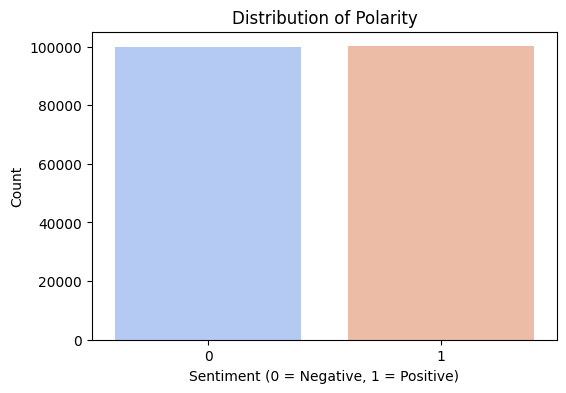

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='polarity', data=data, palette='coolwarm')
plt.title("Distribution of Polarity")
plt.xlabel("Sentiment (0 = Negative, 1 = Positive)")
plt.ylabel("Count")
plt.show()


In [ ]:

data.drop(['date','query','user','word count'], axis=1, inplace=True)

In [ ]:
data.drop('id', axis=1, inplace=True)

In [ ]:
data.head(10)

,polarity,text
353705,0,@TinchenFFM what sort of news? I guess u've he...
835810,1,@paulawhite Started reading Sci-Fi in 8th gr. ...
1235288,1,"@MadJackie im sure your baskets will b great, ..."
563967,0,Depression is so horrible. I just want my litt...
1257110,1,July 6th...Blackberry Storm
408383,0,quite tired! been getting up early! like at 9 ...
1323587,1,@dokus fav: http://bit.ly/167PK7 love is ever...
1129722,1,loverd her day in the sea with Jay
666737,0,All but one of my lizard babies grew up and le...
767525,0,ugh bbl... i dont kno why this charger isnt wo...


In [ ]:
(data.isnull().sum() / len(data))*100

,0
polarity,0.0
text,0.0


In [ ]:
data['text'] = data['text'].astype('str')

In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

stopword = set(stopwords.words('english'))

print("{")
for word in sorted(stopword):
    print(f"  '{word}',")
print("}")


{
  'a',
  'about',
  'above',
  'after',
  'again',
  'against',
  'ain',
  'all',
  'am',
  'an',
  'and',
  'any',
  'are',
  'aren',
  'aren't',
  'as',
  'at',
  'be',
  'because',
  'been',
  'before',
  'being',
  'below',
  'between',
  'both',
  'but',
  'by',
  'can',
  'couldn',
  'couldn't',
  'd',
  'did',
  'didn',
  'didn't',
  'do',
  'does',
  'doesn',
  'doesn't',
  'doing',
  'don',
  'don't',
  'down',
  'during',
  'each',
  'few',
  'for',
  'from',
  'further',
  'had',
  'hadn',
  'hadn't',
  'has',
  'hasn',
  'hasn't',
  'have',
  'haven',
  'haven't',
  'having',
  'he',
  'he'd',
  'he'll',
  'he's',
  'her',
  'here',
  'hers',
  'herself',
  'him',
  'himself',
  'his',
  'how',
  'i',
  'i'd',
  'i'll',
  'i'm',
  'i've',
  'if',
  'in',
  'into',
  'is',
  'isn',
  'isn't',
  'it',
  'it'd',
  'it'll',
  'it's',
  'its',
  'itself',
  'just',
  'll',
  'm',
  'ma',
  'me',
  'mightn',
  'mightn't',
  'more',
  'most',
  'mustn',
  'mustn't',
  'my',
  'm

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import nltk
import os

# Specify a download directory
download_dir = '/usr/share/nltk_data'
nltk.download('punkt', download_dir=download_dir, force=True)
nltk.download('wordnet', download_dir=download_dir, force=True)


# Add the download directory to NLTK's data path
nltk.data.path.append(download_dir)

print("NLTK resources downloaded and path updated.")

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


NLTK resources downloaded and path updated.


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import re

stopword = set(stopwords.words('english'))

def process_tweets(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r"http[s]?://\S+|www\.\S+", '', tweet)
    tweet = re.sub(r"@\w+", '', tweet)
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(tweet)
    tokens = [w for w in tokens if w not in stopword]
    lemmatizer = WordNetLemmatizer()
    final_words = [lemmatizer.lemmatize(w) for w in tokens if len(w) > 1]
    return ' '.join(final_words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
data['processed_tweets'] = data['text'].apply(process_tweets)
print("Text Preprocessing Complete.")


Text Preprocessing Complete.


In [ ]:
data.head(10)

,polarity,text,processed_tweets
353705,0,@TinchenFFM what sort of news? I guess u've he...,sort news guess uve heard phee donnies respons...
835810,1,@paulawhite Started reading Sci-Fi in 8th gr. ...,started reading scifi 8th gr h librarian told ...
1235288,1,"@MadJackie im sure your baskets will b great, ...",im sure basket great always
563967,0,Depression is so horrible. I just want my litt...,depression horrible want little sister suffer ...
1257110,1,July 6th...Blackberry Storm,july 6thblackberry storm
408383,0,quite tired! been getting up early! like at 9 ...,quite tired getting early like morning know we...
1323587,1,@dokus fav: http://bit.ly/167PK7 love is ever...,fav love everywhere even construction yard
1129722,1,loverd her day in the sea with Jay,loverd day sea jay
666737,0,All but one of my lizard babies grew up and le...,one lizard baby grew left
767525,0,ugh bbl... i dont kno why this charger isnt wo...,ugh bbl dont kno charger isnt working


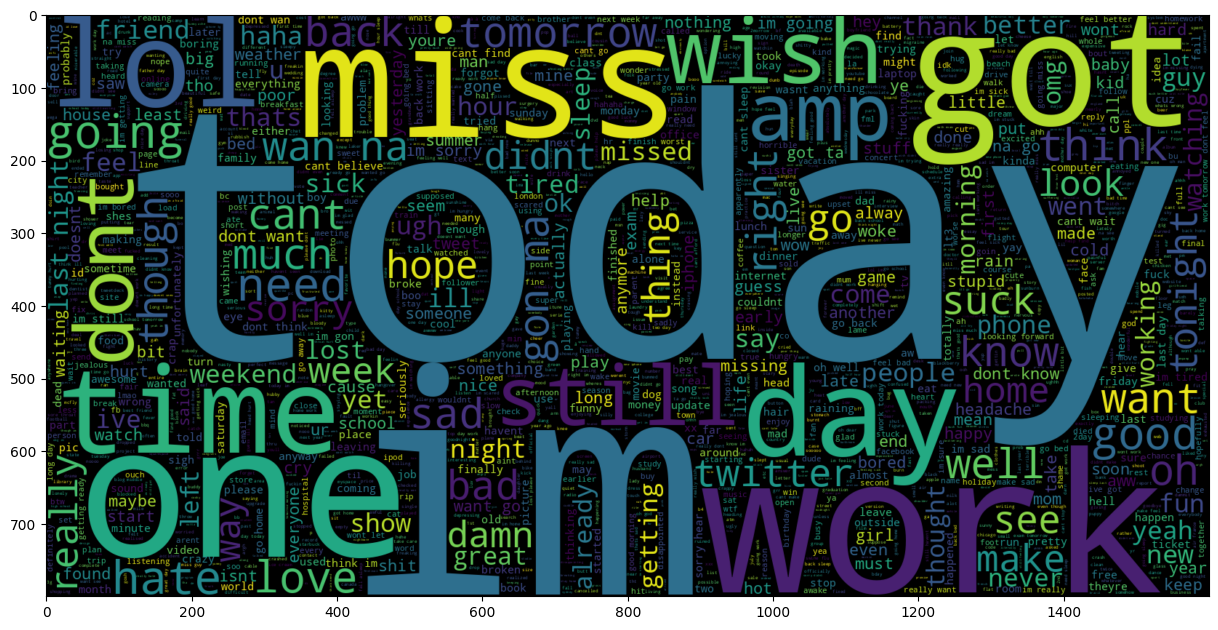

In [ ]:
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.polarity == 0].processed_tweets))
plt.imshow(wc , interpolation = 'bilinear')

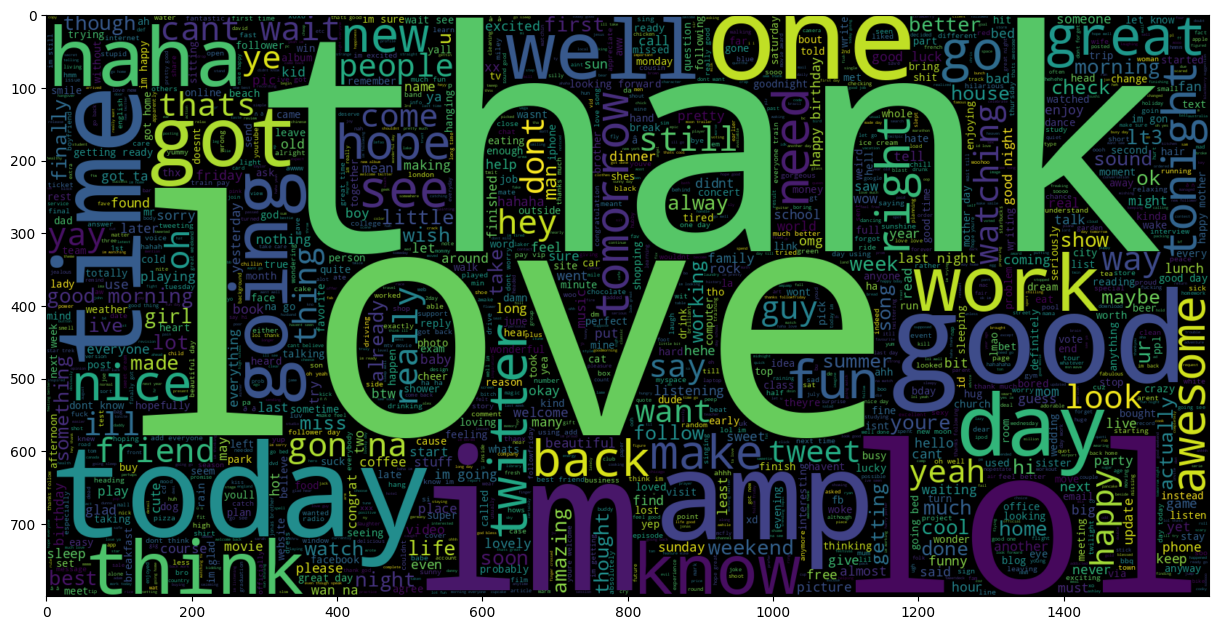

In [ ]:
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.polarity == 1].processed_tweets))
plt.imshow(wc , interpolation = 'bilinear')

In [ ]:
X = data['processed_tweets'].values
y = data['polarity'].values

In [ ]:
print(X.shape)
print(y.shape)

(200000,)
(200000,)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Use the raw cleaned text for vectorization
vector = TfidfVectorizer(sublinear_tf=True)
X = vector.fit_transform(data['processed_tweets'])

print("✅ Vector fitted.")
print("No. of feature words:", len(vector.get_feature_names_out()))


✅ Vector fitted.
No. of feature words: 101582


In [ ]:
print(X.shape)
print(y.shape)

(200000, 101582)
(200000,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=101)

In [ ]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print()
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (160000, 101582)
y_train (160000,)

X_test (40000, 101582)
y_test (40000,)


In [ ]:
def model_Evaluate(model):
    #accuracy of model on training data
    acc_train=model.score(X_train, y_train)
    #accuracy of model on test data
    acc_test=model.score(X_test, y_test)

    print('Accuracy of model on training data : {}'.format(acc_train*100))
    print('Accuracy of model on testing data : {} \n'.format(acc_test*100))

    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))

    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Reds',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

Accuracy of model on training data : 81.84625
Accuracy of model on testing data : 77.0425 

              precision    recall  f1-score   support

           0       0.78      0.75      0.76     19814
           1       0.76      0.79      0.78     20186

    accuracy                           0.77     40000
   macro avg       0.77      0.77      0.77     40000
weighted avg       0.77      0.77      0.77     40000



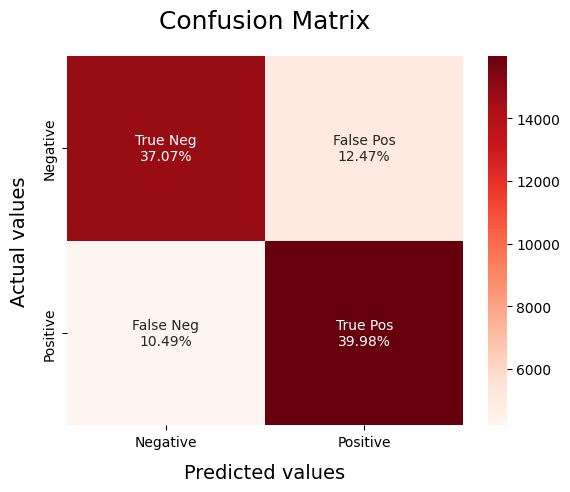

In [ ]:
lg = LogisticRegression()
history=lg.fit(X_train, y_train)
model_Evaluate(lg)

Accuracy of model on training data : 88.2125
Accuracy of model on testing data : 75.8375 

              precision    recall  f1-score   support

           0       0.76      0.74      0.75     19814
           1       0.75      0.78      0.76     20186

    accuracy                           0.76     40000
   macro avg       0.76      0.76      0.76     40000
weighted avg       0.76      0.76      0.76     40000



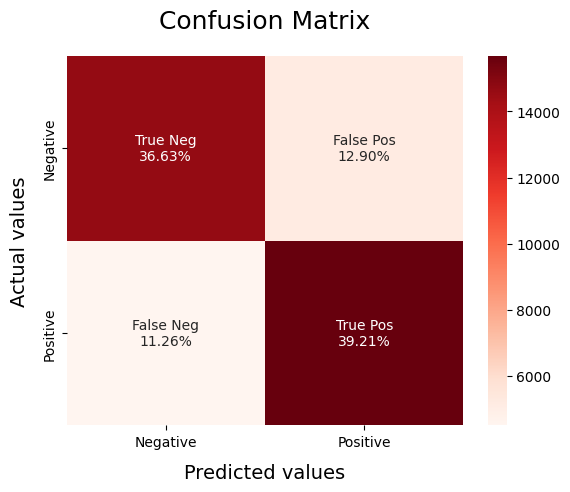

In [ ]:
svm = LinearSVC()
svm.fit(X_train, y_train)
model_Evaluate(svm)

Accuracy of model on training data : 76.94125000000001
Accuracy of model on testing data : 72.3175 

              precision    recall  f1-score   support

           0       0.75      0.66      0.70     19814
           1       0.70      0.79      0.74     20186

    accuracy                           0.72     40000
   macro avg       0.73      0.72      0.72     40000
weighted avg       0.73      0.72      0.72     40000



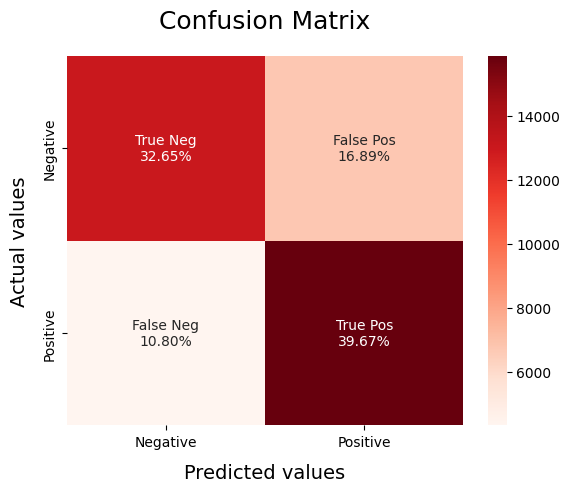

In [ ]:
rf = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', max_depth=50)
rf.fit(X_train, y_train)
model_Evaluate(rf)

Accuracy of model on training data : 83.339375
Accuracy of model on testing data : 75.90249999999999 

              precision    recall  f1-score   support

           0       0.76      0.76      0.76     19814
           1       0.76      0.76      0.76     20186

    accuracy                           0.76     40000
   macro avg       0.76      0.76      0.76     40000
weighted avg       0.76      0.76      0.76     40000



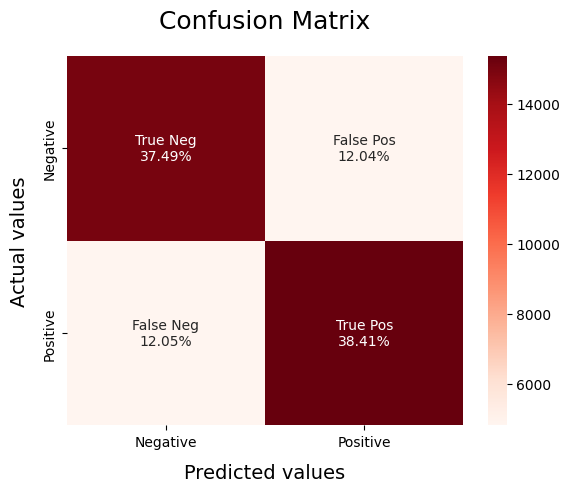

In [ ]:
nb = BernoulliNB()
nb.fit(X_train, y_train)
model_Evaluate(nb)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical


In [ ]:
import keras
keras.__version__

'3.8.0'

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import regularizers


In [ ]:
max_words = 5000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data['processed_tweets'])

sequences = tokenizer.texts_to_sequences(data['processed_tweets'])
tweets = pad_sequences(sequences, maxlen=max_len)

print(tweets)


[[   0    0    0 ...  404 1878 3390]
 [   0    0    0 ... 1975 2874  519]
 [   0    0    0 ... 4484   40  113]
 ...
 [   0    0    0 ...    8   45   96]
 [   0    0    0 ...   89   45 4706]
 [   0    0    0 ...   19    5   58]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(tweets, data.polarity.values, test_size=0.2, random_state=101)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import ModelCheckpoint

model2 = Sequential()
model2.add(Embedding(max_words, 128))
model2.add(LSTM(64,dropout=0.5))
model2.add(Dense(16, activation='relu'))
model2.add(Dense(8, activation='relu'))
model2.add(Dense(1,activation='sigmoid'))
model2.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
checkpoint2 = ModelCheckpoint("rnn_model.keras",
                              monitor='val_accuracy',
                              verbose=1,
                              save_best_only=True,
                              mode='auto',
                              save_freq='epoch',
                              save_weights_only=False)
history = model2.fit(X_train, y_train, epochs=10,validation_data=(X_test, y_test),callbacks=[checkpoint2])



Epoch 1/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.7239 - loss: 0.5350
Epoch 1: val_accuracy improved from -inf to 0.76807, saving model to rnn_model.keras
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 702s 139ms/step - accuracy: 0.7240 - loss: 0.5350 - val_accuracy: 0.7681 - val_loss: 0.4786
Epoch 2/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.7807 - loss: 0.4619
Epoch 2: val_accuracy improved from 0.76807 to 0.77220, saving model to rnn_model.keras
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 703s 132ms/step - accuracy: 0.7807 - loss: 0.4619 - val_accuracy: 0.7722 - val_loss: 0.4741
Epoch 3/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.7939 - loss: 0.4400
Epoch 3: val_accuracy improved from 0.77220 to 0.77237, saving model to rnn_model.keras
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 705s 136ms/step - accuracy: 0.7939 - loss: 0.4400 - val_accuracy: 0.7724 - val_loss: 0.4777
Epoch 4/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.8009 - loss: 0.4253
Epoch 4: v

In [ ]:
sequence = tokenizer.texts_to_sequences(['this data science article is the worst ever'])
test = pad_sequences(sequence, maxlen=max_len)
pred = model2.predict(test)
if pred > 0.5:
  print('Positive')
else:
  print('Negative')

In [ ]:
model = keras.models.load_model('rnn_model.hdf5')
sequence = tokenizer.texts_to_sequences(['this data science article is the best ever'])
test = pad_sequences(sequence, maxlen=max_len)
pred = model.predict(test)
if pred > 0.5:
  print('Positive')
else:
  print('Negative')

In [ ]:
import pickle

file = open('vectoriser.pickle','wb')
pickle.dump(vector, file)
file.close()

file = open('logisticRegression.pickle','wb')
pickle.dump(lg, file)
file.close()

file = open('SVM.pickle','wb')
pickle.dump(svm, file)
file.close()

file = open('RandomForest.pickle','wb')
pickle.dump(rf, file)
file.close()

file = open('NaivesBayes.pickle','wb')
pickle.dump(nb, file)
file.close()

In [ ]:
def load_models():
    # Load the vectoriser.
    file = open('vectoriser.pickle', 'rb')
    vectoriser = pickle.load(file)
    file.close()
    # Load the LR Model.
    file = open('logisticRegression.pickle', 'rb')
    lg = pickle.load(file)
    file.close()
    return vectoriser, lg

In [ ]:
def predict(vectoriser, model, text):
    # Predict the sentiment
    processes_text=[process_tweets(sen) for sen in text]
    textdata = vectoriser.transform(processes_text)
    sentiment = model.predict(textdata)

    # Make a list of text with sentiment.
    data = []
    for text, pred in zip(text, sentiment):
        data.append((text,pred))
    # Convert the list into a Pandas DataFrame.
    df = pd.DataFrame(data, columns = ['text','sentiment'])
    df = df.replace([0,1], ["Negative","Positive"])
    return df

In [ ]:
if __name__=="__main__":
    # Loading the models.
    vectoriser, lg = load_models()

    # Text to classify should be in a list.
    text = ["I love machine learning",
            "Work is too hectic.",
            "Mr.Sharama, I feel so good"]

    df = predict(vectoriser, lg, text)
    print(df.head())